# 09 - Discrete Probability Distributions

**Discrete distributions:** For outcomes you can count (number of clicks, sales, defects).

Common types:
- **Binomial:** Fixed trials, each success/failure (coin flips, ad clicks)
- **Poisson:** Rare events over time/space (customers per hour, emails per day)
- **Geometric:** Number of tries until first success (sales calls until first 'yes')

**Key Idea:** Each model answers different 'counting' questions:
- Binomial: "How many successes in n tries?"
- Poisson: "How many events in this time window?"
- Geometric: "How long until first success?"

## Binomial Distribution: Website Visitors

Out of 10 website visitors, how many will buy? (Success probability = 30%)

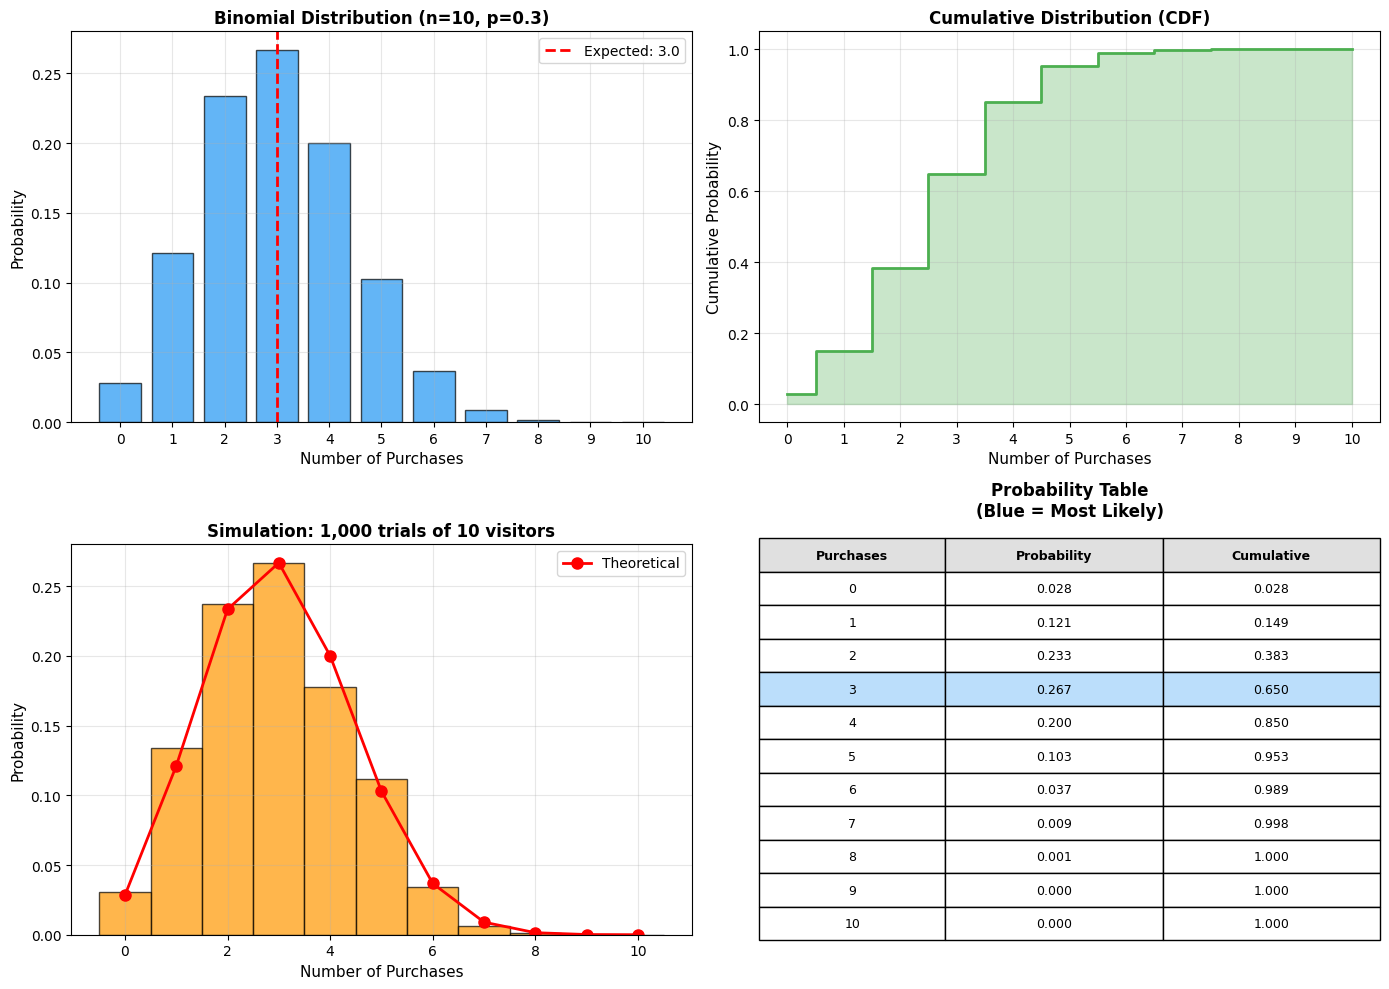


📊 Binomial Distribution Analysis:

Scenario: 10 website visitors, 30% conversion rate

Key statistics:
   → Expected purchases: 3.0
   → Standard deviation: 1.45
   → Most likely outcome: 3 purchases (26.7% probability)

💡 Practical questions answered:
   → P(exactly 3 purchases) = 26.7%
   → P(at least 3 purchases) = 61.7%
   → P(at most 2 purchases) = 38.3%

🎯 Business application:
   → Expect ~3 sales per 10 visitors
   → Can plan inventory and staffing accordingly


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Binomial parameters
n_trials = 10  # 10 visitors
p_success = 0.30  # 30% conversion rate

# Generate binomial distribution
x = np.arange(0, n_trials + 1)
pmf = stats.binom.pmf(x, n_trials, p_success)

# Calculate key statistics
mean = n_trials * p_success
variance = n_trials * p_success * (1 - p_success)
std = np.sqrt(variance)

# Simulate actual outcomes
np.random.seed(42)
simulated_outcomes = np.random.binomial(n_trials, p_success, 1000)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Probability mass function
ax1 = axes[0, 0]
bars = ax1.bar(x, pmf, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Expected: {mean:.1f}')
ax1.set_xlabel('Number of Purchases', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title(f'Binomial Distribution (n={n_trials}, p={p_success})', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xticks(x)

# Cumulative distribution
ax2 = axes[0, 1]
cdf = stats.binom.cdf(x, n_trials, p_success)
ax2.step(x, cdf, where='mid', color='#4CAF50', linewidth=2)
ax2.fill_between(x, cdf, alpha=0.3, color='#4CAF50', step='mid')
ax2.set_xlabel('Number of Purchases', fontsize=11)
ax2.set_ylabel('Cumulative Probability', fontsize=11)
ax2.set_title('Cumulative Distribution (CDF)', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.set_xticks(x)

# Simulated outcomes
ax3 = axes[1, 0]
ax3.hist(simulated_outcomes, bins=np.arange(-0.5, n_trials + 1.5, 1), 
        color='#FF9800', alpha=0.7, edgecolor='black', density=True)
ax3.plot(x, pmf, 'ro-', linewidth=2, markersize=8, label='Theoretical')
ax3.set_xlabel('Number of Purchases', fontsize=11)
ax3.set_ylabel('Probability', fontsize=11)
ax3.set_title(f'Simulation: 1,000 trials of {n_trials} visitors', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Probability table
ax4 = axes[1, 1]
ax4.axis('off')
table_data = [['Purchases', 'Probability', 'Cumulative']]
for i in range(len(x)):
    table_data.append([f'{x[i]}', f'{pmf[i]:.3f}', f'{cdf[i]:.3f}'])

table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.3, 0.35, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.8)

# Style header row
for i in range(3):
    table[(0, i)].set_facecolor('#E0E0E0')
    table[(0, i)].set_text_props(weight='bold')

# Highlight most likely outcome
most_likely = np.argmax(pmf)
table[(most_likely + 1, 0)].set_facecolor('#BBDEFB')
table[(most_likely + 1, 1)].set_facecolor('#BBDEFB')
table[(most_likely + 1, 2)].set_facecolor('#BBDEFB')

ax4.set_title('Probability Table\n(Blue = Most Likely)', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 Binomial Distribution Analysis:")
print(f"\nScenario: {n_trials} website visitors, {p_success:.0%} conversion rate")
print(f"\nKey statistics:")
print(f"   → Expected purchases: {mean:.1f}")
print(f"   → Standard deviation: {std:.2f}")
print(f"   → Most likely outcome: {x[most_likely]} purchases ({pmf[most_likely]:.1%} probability)")

print(f"\n💡 Practical questions answered:")
prob_at_least_3 = 1 - cdf[2]
prob_exactly_3 = pmf[3]
prob_at_most_2 = cdf[2]
print(f"   → P(exactly 3 purchases) = {prob_exactly_3:.1%}")
print(f"   → P(at least 3 purchases) = {prob_at_least_3:.1%}")
print(f"   → P(at most 2 purchases) = {prob_at_most_2:.1%}")

print(f"\n🎯 Business application:")
print(f"   → Expect ~{mean:.0f} sales per {n_trials} visitors")
print(f"   → Can plan inventory and staffing accordingly")

## Poisson Distribution: Customer Arrivals

Help desk gets average 4 calls per hour. How many calls in the next hour?

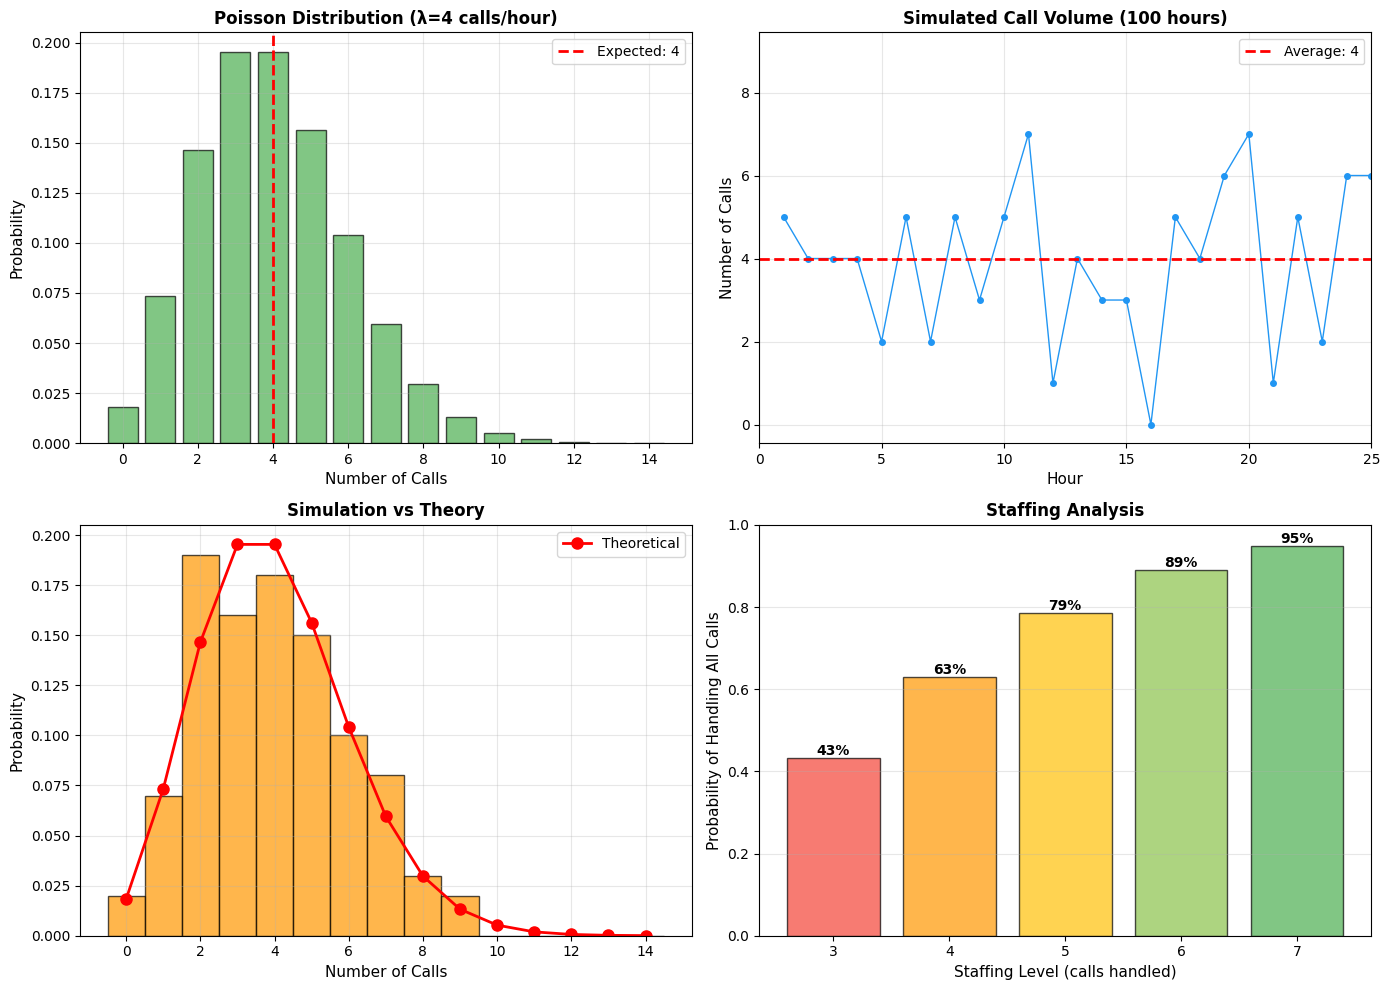


📞 Poisson Distribution Analysis:

Scenario: Help desk, average 4 calls per hour

Key characteristics:
   → Mean = Variance = 4
   → Standard deviation: 2.00

💡 Probability questions:
   → P(0 calls) = 1.8% (quiet hour)
   → P(more than 5 calls) = 21.5% (busy hour)
   → P(2 to 6 calls) = 79.8% (typical range)

🎯 Staffing decisions:
   → 4 staff: 63% chance of handling all calls
   → 6 staff: 89% chance of handling all calls
   → Trade-off between cost (staff) and service level


In [2]:
# Poisson parameter
lambda_rate = 4  # Average 4 calls per hour

# Generate Poisson distribution
x_poisson = np.arange(0, 15)
pmf_poisson = stats.poisson.pmf(x_poisson, lambda_rate)
cdf_poisson = stats.poisson.cdf(x_poisson, lambda_rate)

# Simulate
np.random.seed(42)
simulated_hours = np.random.poisson(lambda_rate, 100)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PMF
ax1 = axes[0, 0]
bars = ax1.bar(x_poisson, pmf_poisson, color='#4CAF50', alpha=0.7, edgecolor='black')
ax1.axvline(lambda_rate, color='red', linestyle='--', linewidth=2, label=f'Expected: {lambda_rate}')
ax1.set_xlabel('Number of Calls', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title(f'Poisson Distribution (λ={lambda_rate} calls/hour)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Simulation over time
ax2 = axes[0, 1]
hours = np.arange(1, len(simulated_hours) + 1)
ax2.plot(hours, simulated_hours, marker='o', color='#2196F3', linewidth=1, markersize=4)
ax2.axhline(lambda_rate, color='red', linestyle='--', linewidth=2, label=f'Average: {lambda_rate}')
ax2.set_xlabel('Hour', fontsize=11)
ax2.set_ylabel('Number of Calls', fontsize=11)
ax2.set_title('Simulated Call Volume (100 hours)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xlim(0, 25)

# Histogram of simulation
ax3 = axes[1, 0]
ax3.hist(simulated_hours, bins=np.arange(-0.5, 15.5, 1), 
        color='#FF9800', alpha=0.7, edgecolor='black', density=True)
ax3.plot(x_poisson, pmf_poisson, 'ro-', linewidth=2, markersize=8, label='Theoretical')
ax3.set_xlabel('Number of Calls', fontsize=11)
ax3.set_ylabel('Probability', fontsize=11)
ax3.set_title('Simulation vs Theory', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Staffing scenarios
ax4 = axes[1, 1]
staffing_levels = [3, 4, 5, 6, 7]
prob_handle_all = [cdf_poisson[level] for level in staffing_levels]
colors_staff = ['#F44336', '#FF9800', '#FFC107', '#8BC34A', '#4CAF50']
bars = ax4.bar(staffing_levels, prob_handle_all, color=colors_staff, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Staffing Level (calls handled)', fontsize=11)
ax4.set_ylabel('Probability of Handling All Calls', fontsize=11)
ax4.set_title('Staffing Analysis', fontsize=12, fontweight='bold')
ax4.set_ylim(0, 1)
ax4.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, prob_handle_all):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📞 Poisson Distribution Analysis:")
print(f"\nScenario: Help desk, average {lambda_rate} calls per hour")
print(f"\nKey characteristics:")
print(f"   → Mean = Variance = {lambda_rate}")
print(f"   → Standard deviation: {np.sqrt(lambda_rate):.2f}")

print(f"\n💡 Probability questions:")
prob_0_calls = pmf_poisson[0]
prob_more_than_5 = 1 - cdf_poisson[5]
prob_2_to_6 = cdf_poisson[6] - cdf_poisson[1]
print(f"   → P(0 calls) = {prob_0_calls:.1%} (quiet hour)")
print(f"   → P(more than 5 calls) = {prob_more_than_5:.1%} (busy hour)")
print(f"   → P(2 to 6 calls) = {prob_2_to_6:.1%} (typical range)")

print(f"\n🎯 Staffing decisions:")
print(f"   → 4 staff: {prob_handle_all[1]:.0%} chance of handling all calls")
print(f"   → 6 staff: {prob_handle_all[3]:.0%} chance of handling all calls")
print(f"   → Trade-off between cost (staff) and service level")

## Geometric Distribution: Sales Calls Until First Success

Sales rep has 20% success rate per call. How many calls until first 'yes'?

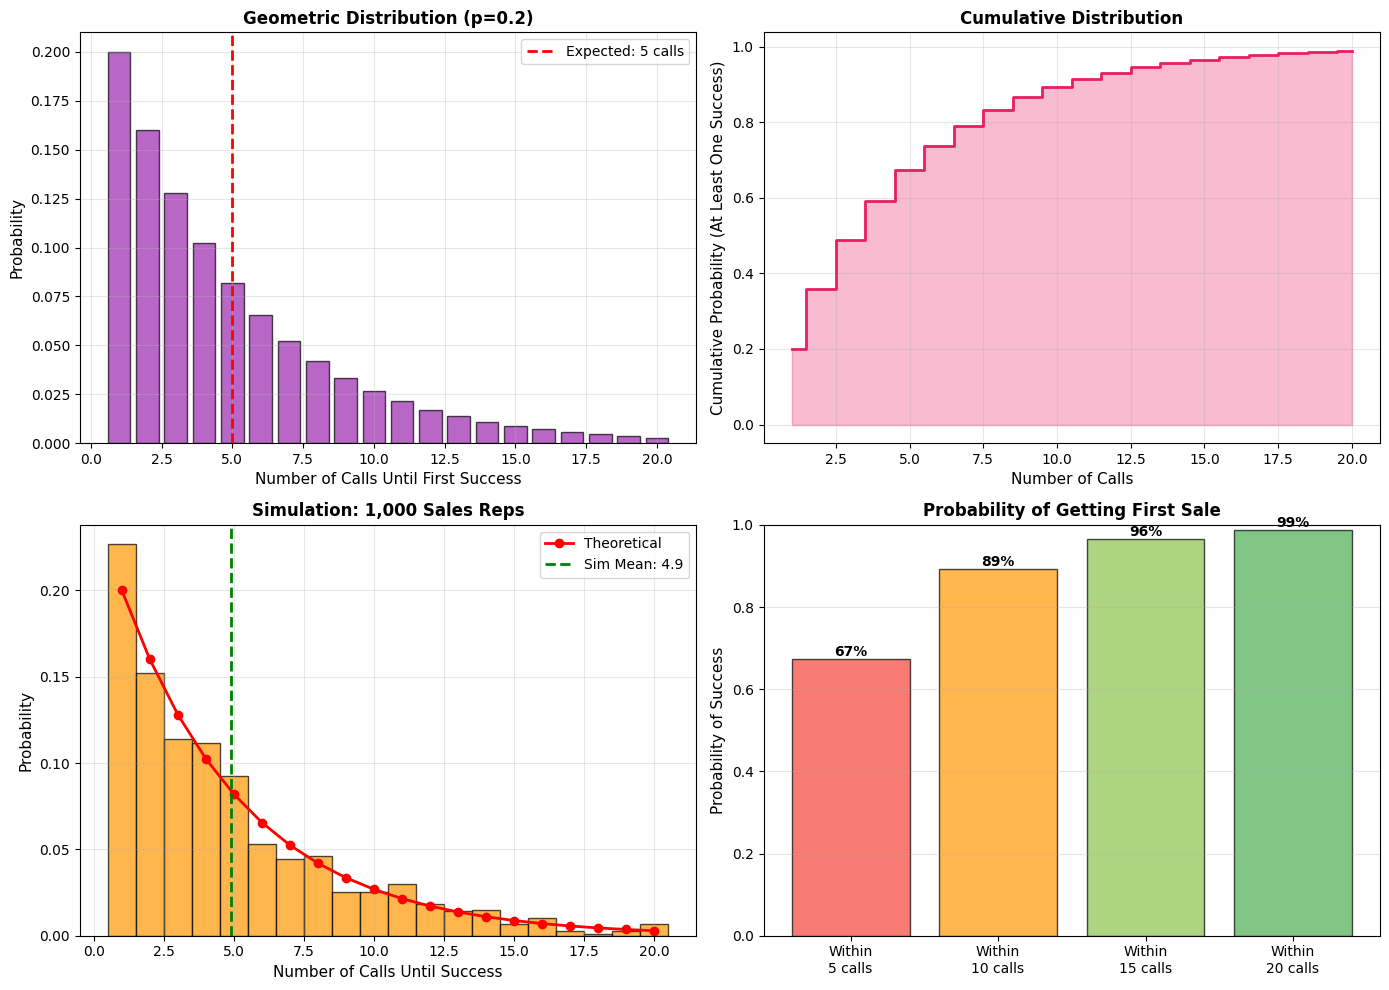


📱 Geometric Distribution Analysis:

Scenario: Sales calls with 20% success rate per call

Key statistics:
   → Expected calls until first success: 5
   → Variance: 20.0

💡 Probability insights:
   → P(success on 1st call) = 20%
   → P(success within 5 calls) = 67%
   → P(success within 10 calls) = 89%
   → P(more than 10 calls needed) = 11%

🎯 Business planning:
   → Plan for ~5 calls per sale on average
   → But wide variability: some get lucky, some struggle
   → 12% of reps needed >10 calls in simulation


In [3]:
# Geometric parameter
p_success_call = 0.20  # 20% success per call

# Generate geometric distribution
x_geom = np.arange(1, 21)  # Number of calls (starts at 1)
pmf_geom = stats.geom.pmf(x_geom, p_success_call)
cdf_geom = stats.geom.cdf(x_geom, p_success_call)

# Expected value
expected_calls = 1 / p_success_call

# Simulate
np.random.seed(42)
simulated_attempts = stats.geom.rvs(p_success_call, size=1000)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PMF
ax1 = axes[0, 0]
bars = ax1.bar(x_geom, pmf_geom, color='#9C27B0', alpha=0.7, edgecolor='black')
ax1.axvline(expected_calls, color='red', linestyle='--', linewidth=2, label=f'Expected: {expected_calls:.0f} calls')
ax1.set_xlabel('Number of Calls Until First Success', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title(f'Geometric Distribution (p={p_success_call})', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# CDF
ax2 = axes[0, 1]
ax2.step(x_geom, cdf_geom, where='mid', color='#E91E63', linewidth=2)
ax2.fill_between(x_geom, cdf_geom, alpha=0.3, color='#E91E63', step='mid')
ax2.set_xlabel('Number of Calls', fontsize=11)
ax2.set_ylabel('Cumulative Probability (At Least One Success)', fontsize=11)
ax2.set_title('Cumulative Distribution', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Simulation histogram
ax3 = axes[1, 0]
ax3.hist(simulated_attempts, bins=np.arange(0.5, 21.5, 1), 
        color='#FF9800', alpha=0.7, edgecolor='black', density=True)
ax3.plot(x_geom, pmf_geom, 'ro-', linewidth=2, markersize=6, label='Theoretical')
ax3.axvline(np.mean(simulated_attempts), color='green', linestyle='--', linewidth=2, 
           label=f'Sim Mean: {np.mean(simulated_attempts):.1f}')
ax3.set_xlabel('Number of Calls Until Success', fontsize=11)
ax3.set_ylabel('Probability', fontsize=11)
ax3.set_title('Simulation: 1,000 Sales Reps', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Scenario planning
ax4 = axes[1, 1]
scenarios = ['Within\n5 calls', 'Within\n10 calls', 'Within\n15 calls', 'Within\n20 calls']
prob_success = [cdf_geom[4], cdf_geom[9], cdf_geom[14], cdf_geom[19]]
colors_scenarios = ['#F44336', '#FF9800', '#8BC34A', '#4CAF50']
bars = ax4.bar(range(len(scenarios)), prob_success, color=colors_scenarios, alpha=0.7, edgecolor='black')
ax4.set_xticks(range(len(scenarios)))
ax4.set_xticklabels(scenarios)
ax4.set_ylabel('Probability of Success', fontsize=11)
ax4.set_title('Probability of Getting First Sale', fontsize=12, fontweight='bold')
ax4.set_ylim(0, 1)
ax4.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, prob_success):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📱 Geometric Distribution Analysis:")
print(f"\nScenario: Sales calls with {p_success_call:.0%} success rate per call")
print(f"\nKey statistics:")
print(f"   → Expected calls until first success: {expected_calls:.0f}")
print(f"   → Variance: {(1-p_success_call)/p_success_call**2:.1f}")

print(f"\n💡 Probability insights:")
print(f"   → P(success on 1st call) = {pmf_geom[0]:.0%}")
print(f"   → P(success within 5 calls) = {cdf_geom[4]:.0%}")
print(f"   → P(success within 10 calls) = {cdf_geom[9]:.0%}")
print(f"   → P(more than 10 calls needed) = {1-cdf_geom[9]:.0%}")

print(f"\n🎯 Business planning:")
print(f"   → Plan for ~{expected_calls:.0f} calls per sale on average")
print(f"   → But wide variability: some get lucky, some struggle")
print(f"   → {np.sum(simulated_attempts > 10)/len(simulated_attempts)*100:.0f}% of reps needed >10 calls in simulation")

## Summary: Discrete Distributions

| Distribution | Use When | Example | Key Parameter |
|--------------|----------|---------|---------------|
| **Binomial** | Fixed trials, count successes | 10 visitors, how many buy? | n (trials), p (success) |
| **Poisson** | Rare events over time/space | Calls per hour, defects per batch | λ (rate) |
| **Geometric** | Trials until first success | Sales calls until first yes | p (success rate) |

### When to Use Which?

**Binomial:**
- Fixed number of trials (known in advance)
- Each trial independent, same success probability
- Count: "How many successes?"

**Poisson:**
- Events occur randomly over time/space
- Average rate is known
- Count: "How many events in this window?"

**Geometric:**
- Keep trying until first success
- Each attempt independent
- Count: "How many tries needed?"

### Real-World Applications
- **A/B testing:** Binomial (out of 1000 users, how many convert?)
- **Customer service:** Poisson (calls per hour, tickets per day)
- **Sales prospecting:** Geometric (calls until first sale)
- **Quality control:** Binomial (defects in sample) or Poisson (defects per unit)

**Remember:** Choose the distribution that matches your counting question!